In [ ]:
##Folder to print results
folder="Results/Nantes"

##Station
file="TX_STAID000737.txt"

##AR model
p=1
method_="monthlyLL"                 # "mean", "median", "concat", "sumLL", "monthlyLL"
periodicity_model="trigo"           # "trigo", "smooth", "autotrigo", "stepwise_trigo"
degree_period=0                     # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
Trendtype="LOESS"                   # "LOESS", "polynomial", "null" (for no additive trend)
trendparam=nothing                  # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1
σ_periodicity_model="trigo"         # "trigo", "smooth", "autotrigo", "stepwise_trigo", "null" (for no multiplicative periodicity)
σ_degree_period=0                   # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
σ_Trendtype="LOESS"                 # "LOESS", "polynomial", "null" (for no multiplicative trend)
σ_trendparam=nothing                # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1

##Simulations
n=100

100

In [2]:
include("table_reader.jl")
include("utils/Missing_values.jl")
include("utils/Structure.jl")
include("utils/Plotting.jl")
cd((@__DIR__))

ERROR: LoadError: too many parameters for type AbstractInterpolation
Stacktrace:
 [1] top-level scope
   @ C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:28
 [2] include
   @ .\Base.jl:557 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2881
 [4] top-level scope
   @ stdin:6
in expression starting at C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:3
in expression starting at stdin:6
┌ Error: Error during loading of extension SparseConnectivityTracerDataInterpolationsExt of SparseConnectivityTracer, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile SparseConnectivityTracerDataInterpolationsExt [

In [3]:
settings = OrderedDict((("file", file),
    ("p", p),
    ("method_", method_),
    ("periodicity_model", periodicity_model),
    ("degree_period", degree_period),
    ("Trendtype", Trendtype),
    ("trendparam", trendparam),
    ("σ_periodicity_model", σ_periodicity_model),
    ("σ_degree_period", σ_degree_period),
    ("σ_Trendtype", σ_Trendtype),
    ("σ_trendparam", σ_trendparam),
    ("n", n)))

OrderedDict{String, Any} with 12 entries:
  "file"                => "TX_STAID000737.txt"
  "p"                   => 1
  "method_"             => "monthlyLL"
  "periodicity_model"   => "trigo"
  "degree_period"       => 0
  "Trendtype"           => "LOESS"
  "trendparam"          => nothing
  "σ_periodicity_model" => "trigo"
  "σ_degree_period"     => 0
  "σ_Trendtype"         => "LOESS"
  "σ_trendparam"        => nothing
  "n"                   => 100

In [4]:
series=extract_series(file,plot=false)
series=truncate_MV(series)
years=unique(Dates.year.(series.DATE))

Caracteristics_Series = init_CaracteristicsSeries(series)

CaracteristicsSeries([5.60864197530864, 6.0851851851851855, 5.533333333333336, 5.366666666666668, 5.716049382716051, 5.77283950617284, 5.401234567901235, 5.356790123456789, 5.698765432098765, 5.741975308641975  …  6.827160493827159, 6.672839506172841, 6.477777777777779, 6.506172839506172, 6.359259259259259, 5.904938271604939, 5.898765432098763, 5.862962962962962, 5.881481481481482, 5.590123456790123], [14.3, 13.9, 13.1, 13.4, 13.4, 14.7, 13.5, 13.4, 14.5, 13.2  …  14.1, 14.2, 13.2, 14.4, 13.8, 13.1, 14.2, 14.2, 16.0, 16.1], 12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       5.72561      4.27158         15.2
   2 │     2       6.92369      4.30074         19.0
   3 │     3      10.4113       4.13513         24.8
   4 │     4      13.9756       4.33257         27.9
   5 │     5      17.7996       4.37329         31.7
   6 │     6      20.7504   

In [5]:
Model = fit_AR(series[:, 2], series.DATE,
    p=p,
    method_=method_,
    periodicity_model=periodicity_model,
    degree_period=degree_period,
    Trendtype=Trendtype,
    trendparam=trendparam,
    σ_periodicity_model=σ_periodicity_model,
    σ_degree_period=σ_degree_period,
    σ_Trendtype=σ_Trendtype,
    σ_trendparam=σ_trendparam)

sample_ = rand(Model, n, series.DATE)


100-element Vector{Vector{Float64}}:
 [10.0, 7.1209110805215, 5.106412281181894, 8.852863859317232, 3.9769587658155046, 6.5534271939319995, 2.0653061319935744, 5.190383391753439, 5.590329800043216, 8.523480238275088  …  1.0532317891034708, 2.68961061636423, 6.06261325070813, 3.1992839626341683, 7.420823220630917, 6.7067122900091025, 6.5652451651827, 6.42386103349843, 5.358432316476575, 5.420533200585124]
 [10.0, 10.028967874593143, 5.479078506547338, 7.934336604354055, 5.40698460342417, 10.05484082809689, 10.31101953024346, 14.667225027393581, 10.414814281027148, 1.573065241515963  …  6.4442178771999234, 5.975799537785206, 5.971533092354454, 6.0424681839608585, 5.063224830023626, 7.625156528411438, 7.157013901860147, 8.382405408517023, 5.614731542850328, 5.51110558228936]
 [10.0, 8.087237732556812, 3.9481711955639476, 7.629619519481194, 12.06593966532642, 12.818731572258697, 7.451150256789473, 2.1481630463499273, -5.161981161061071, -7.479781132124565  …  4.369145994086754, 0.983866223

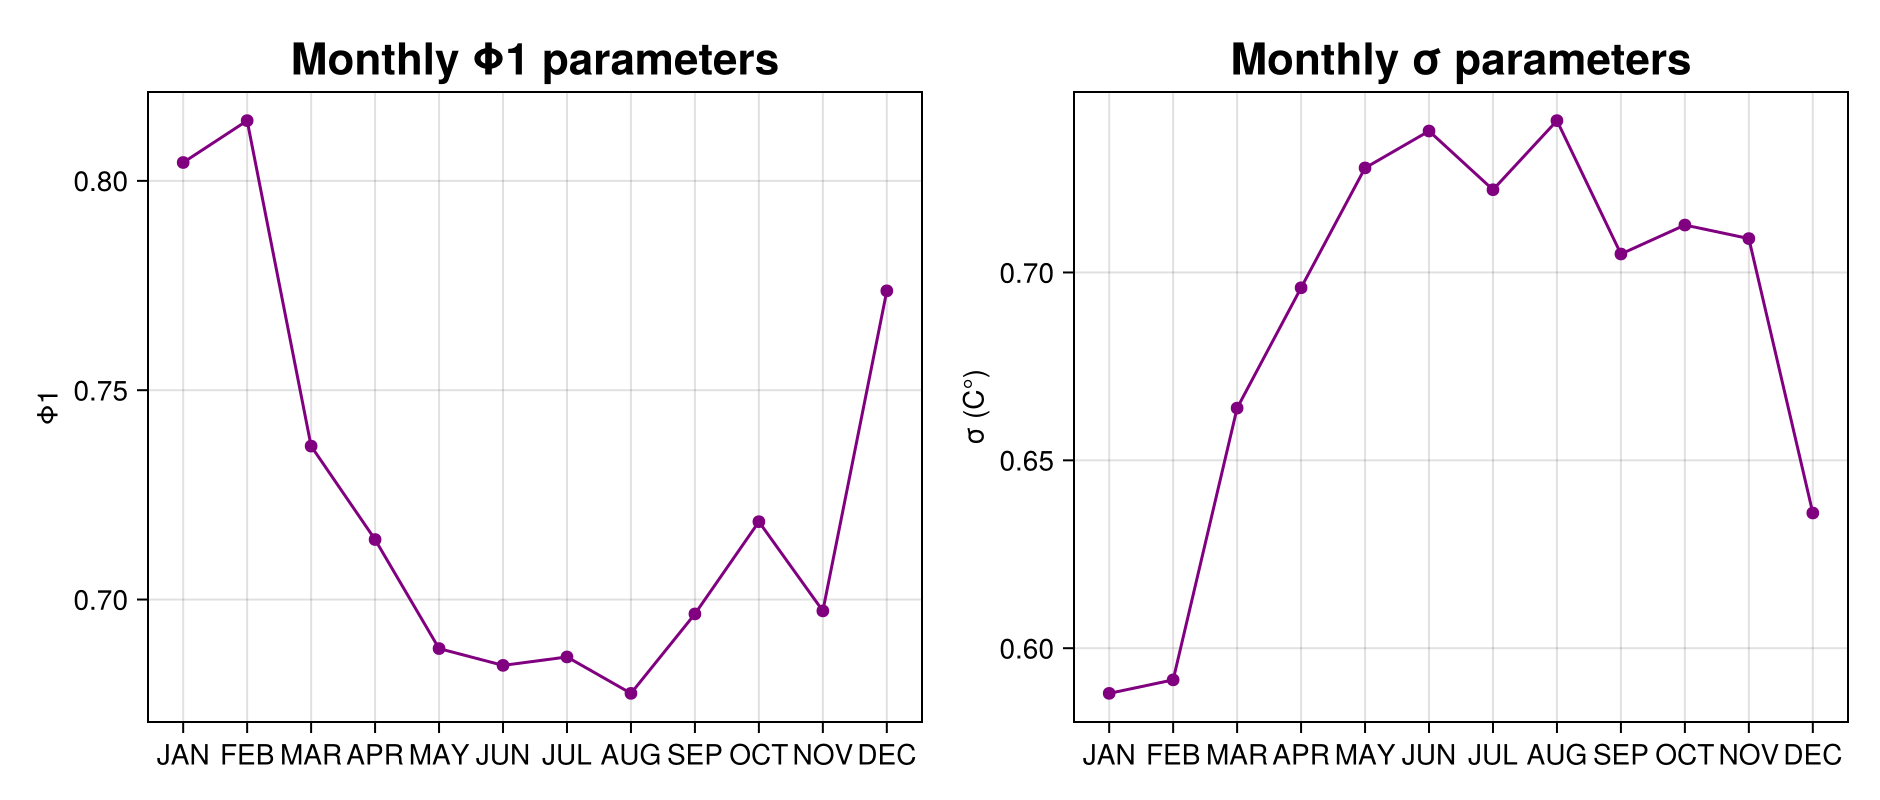

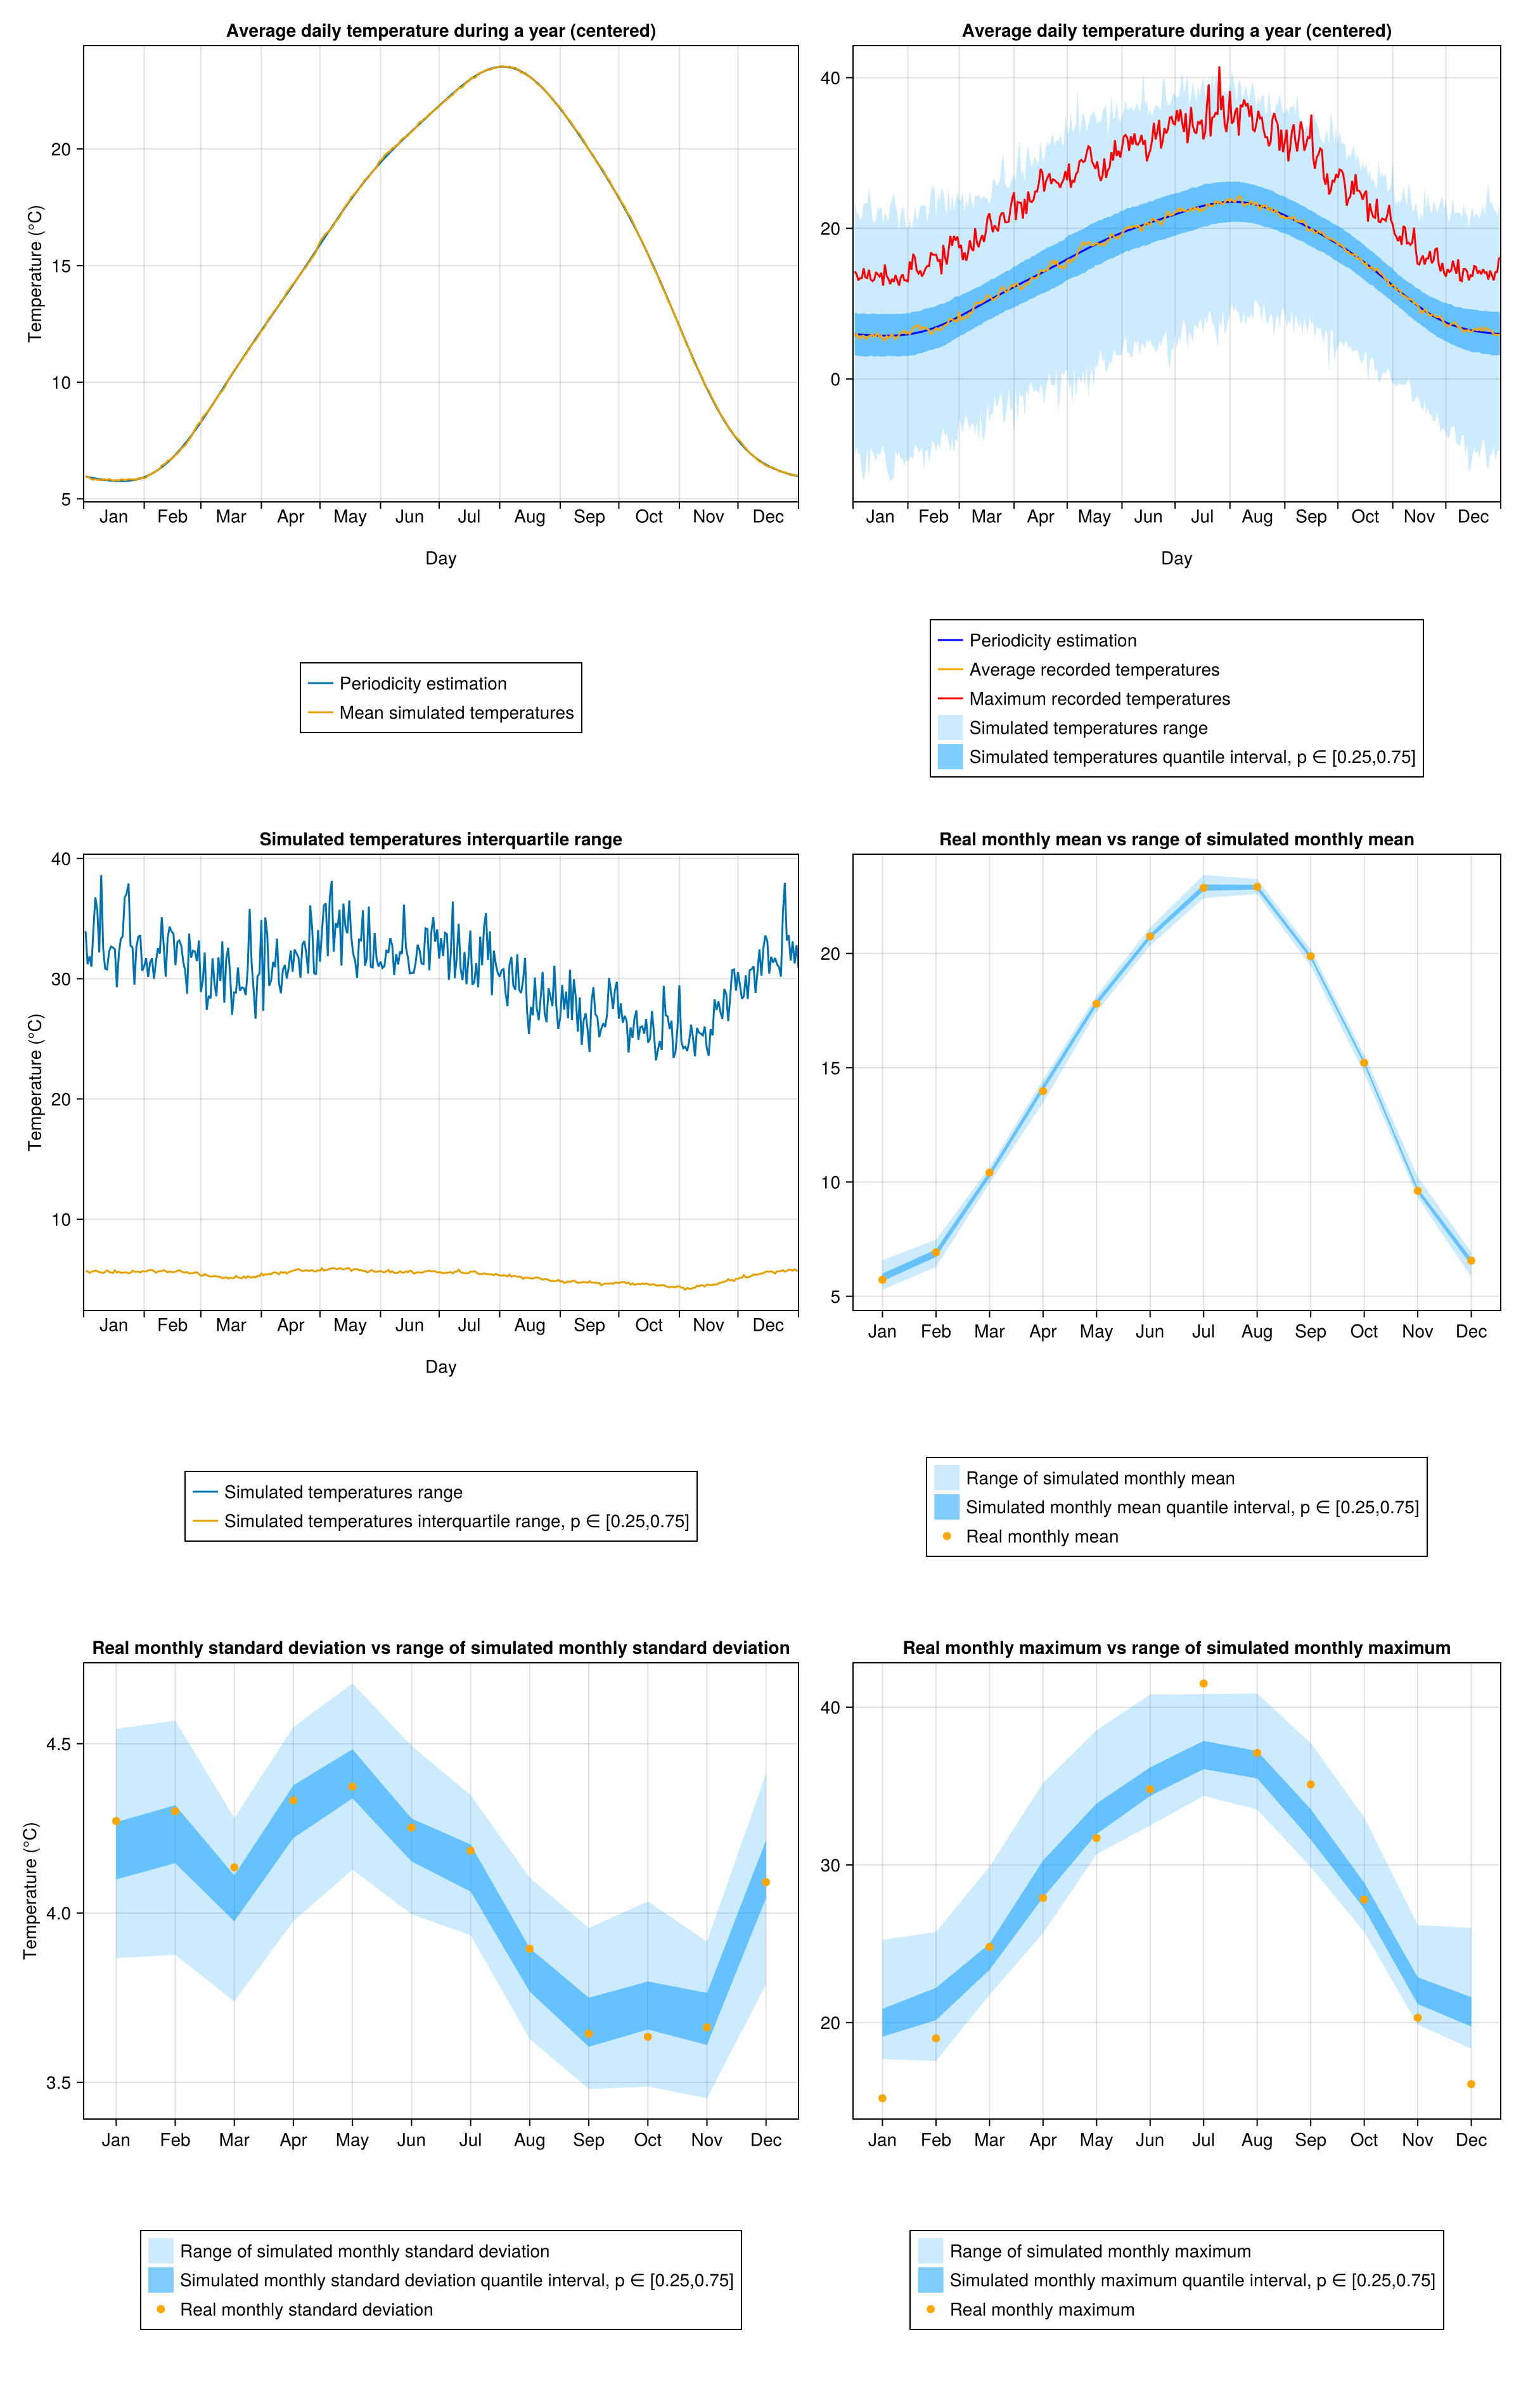

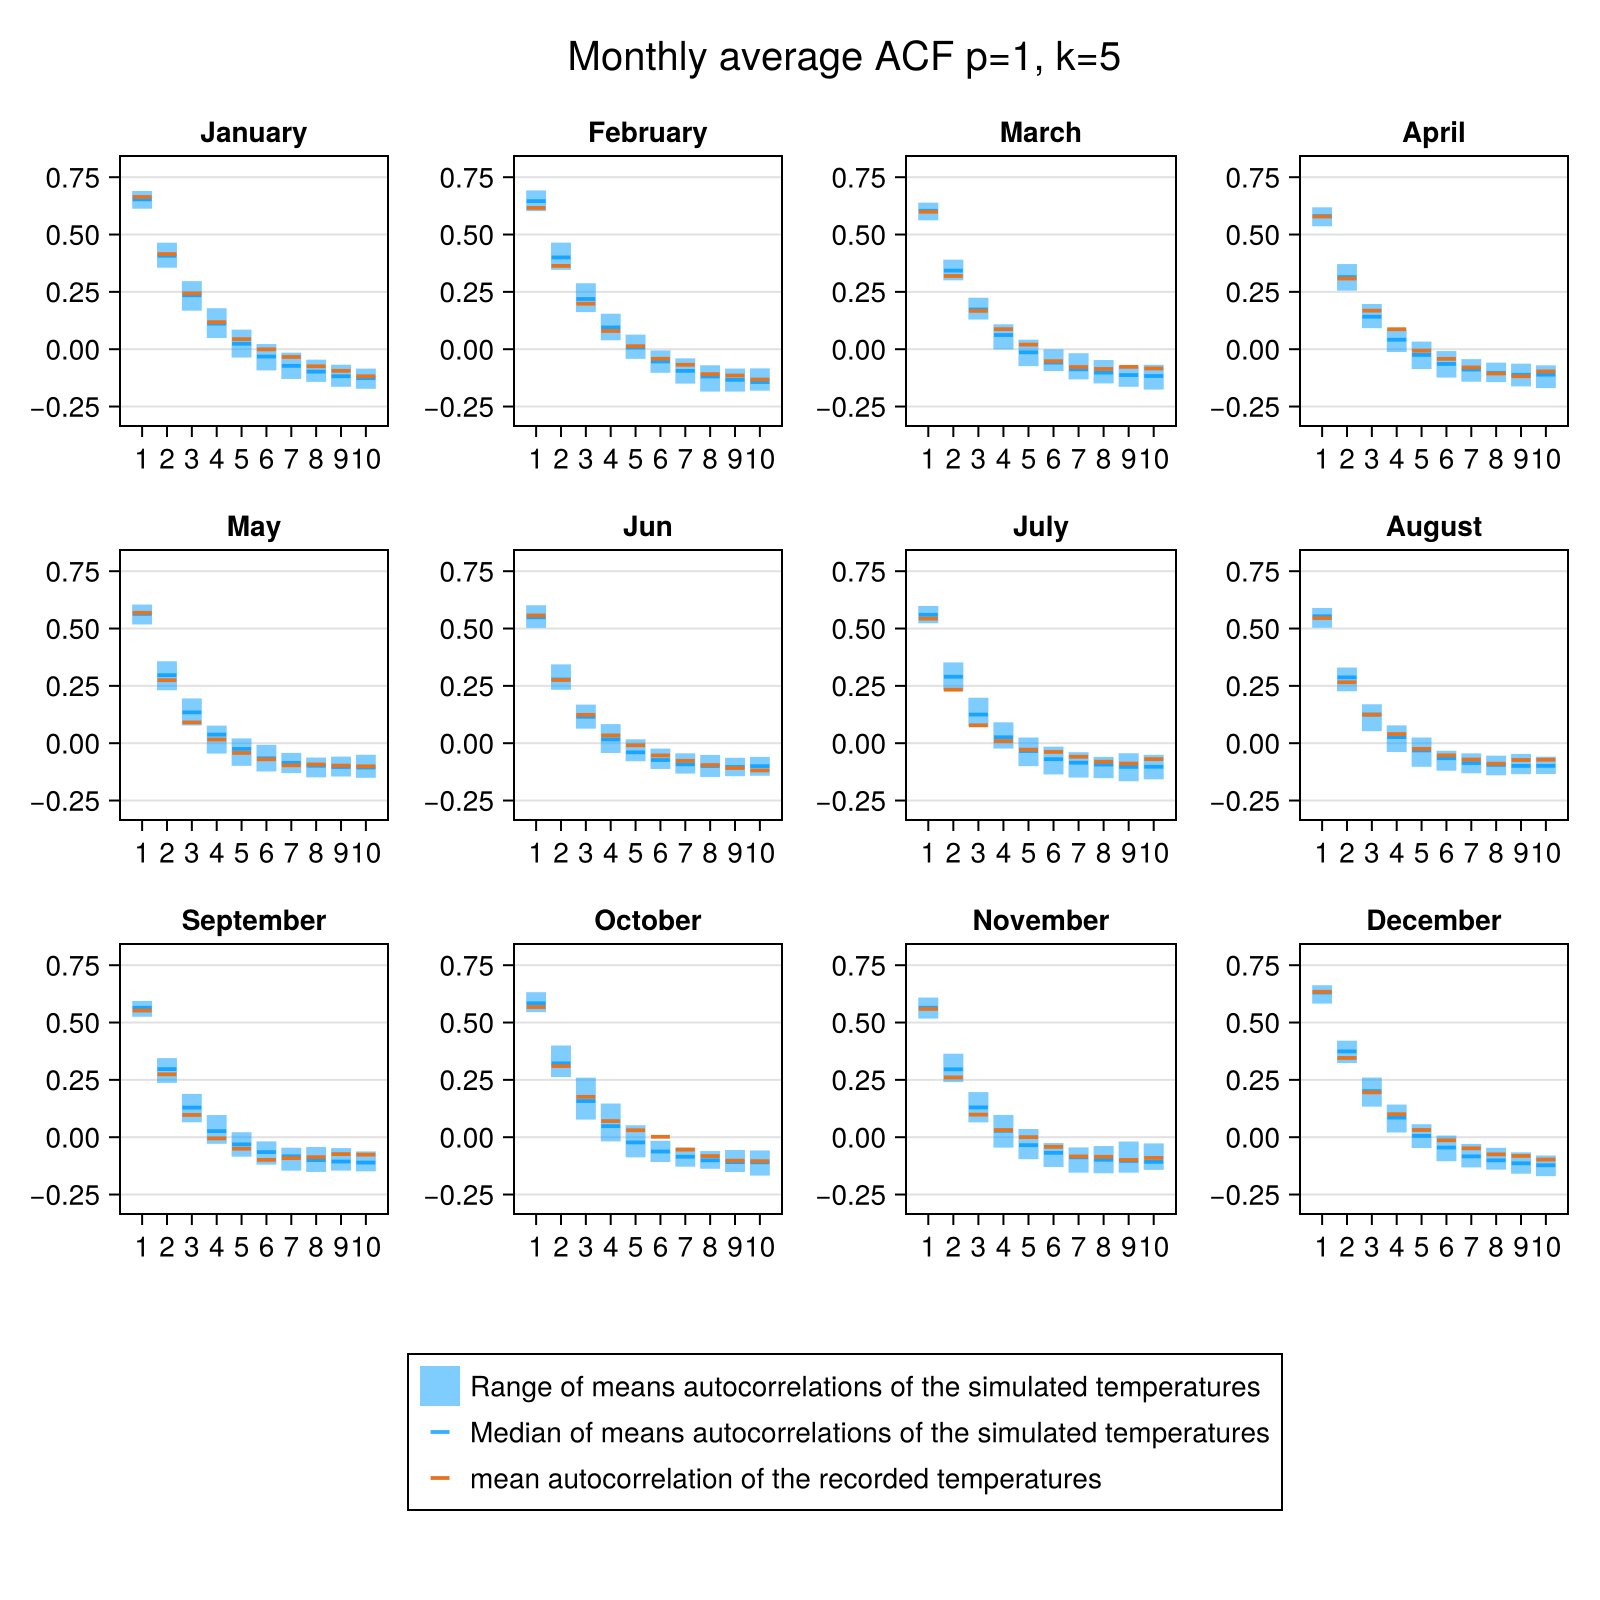

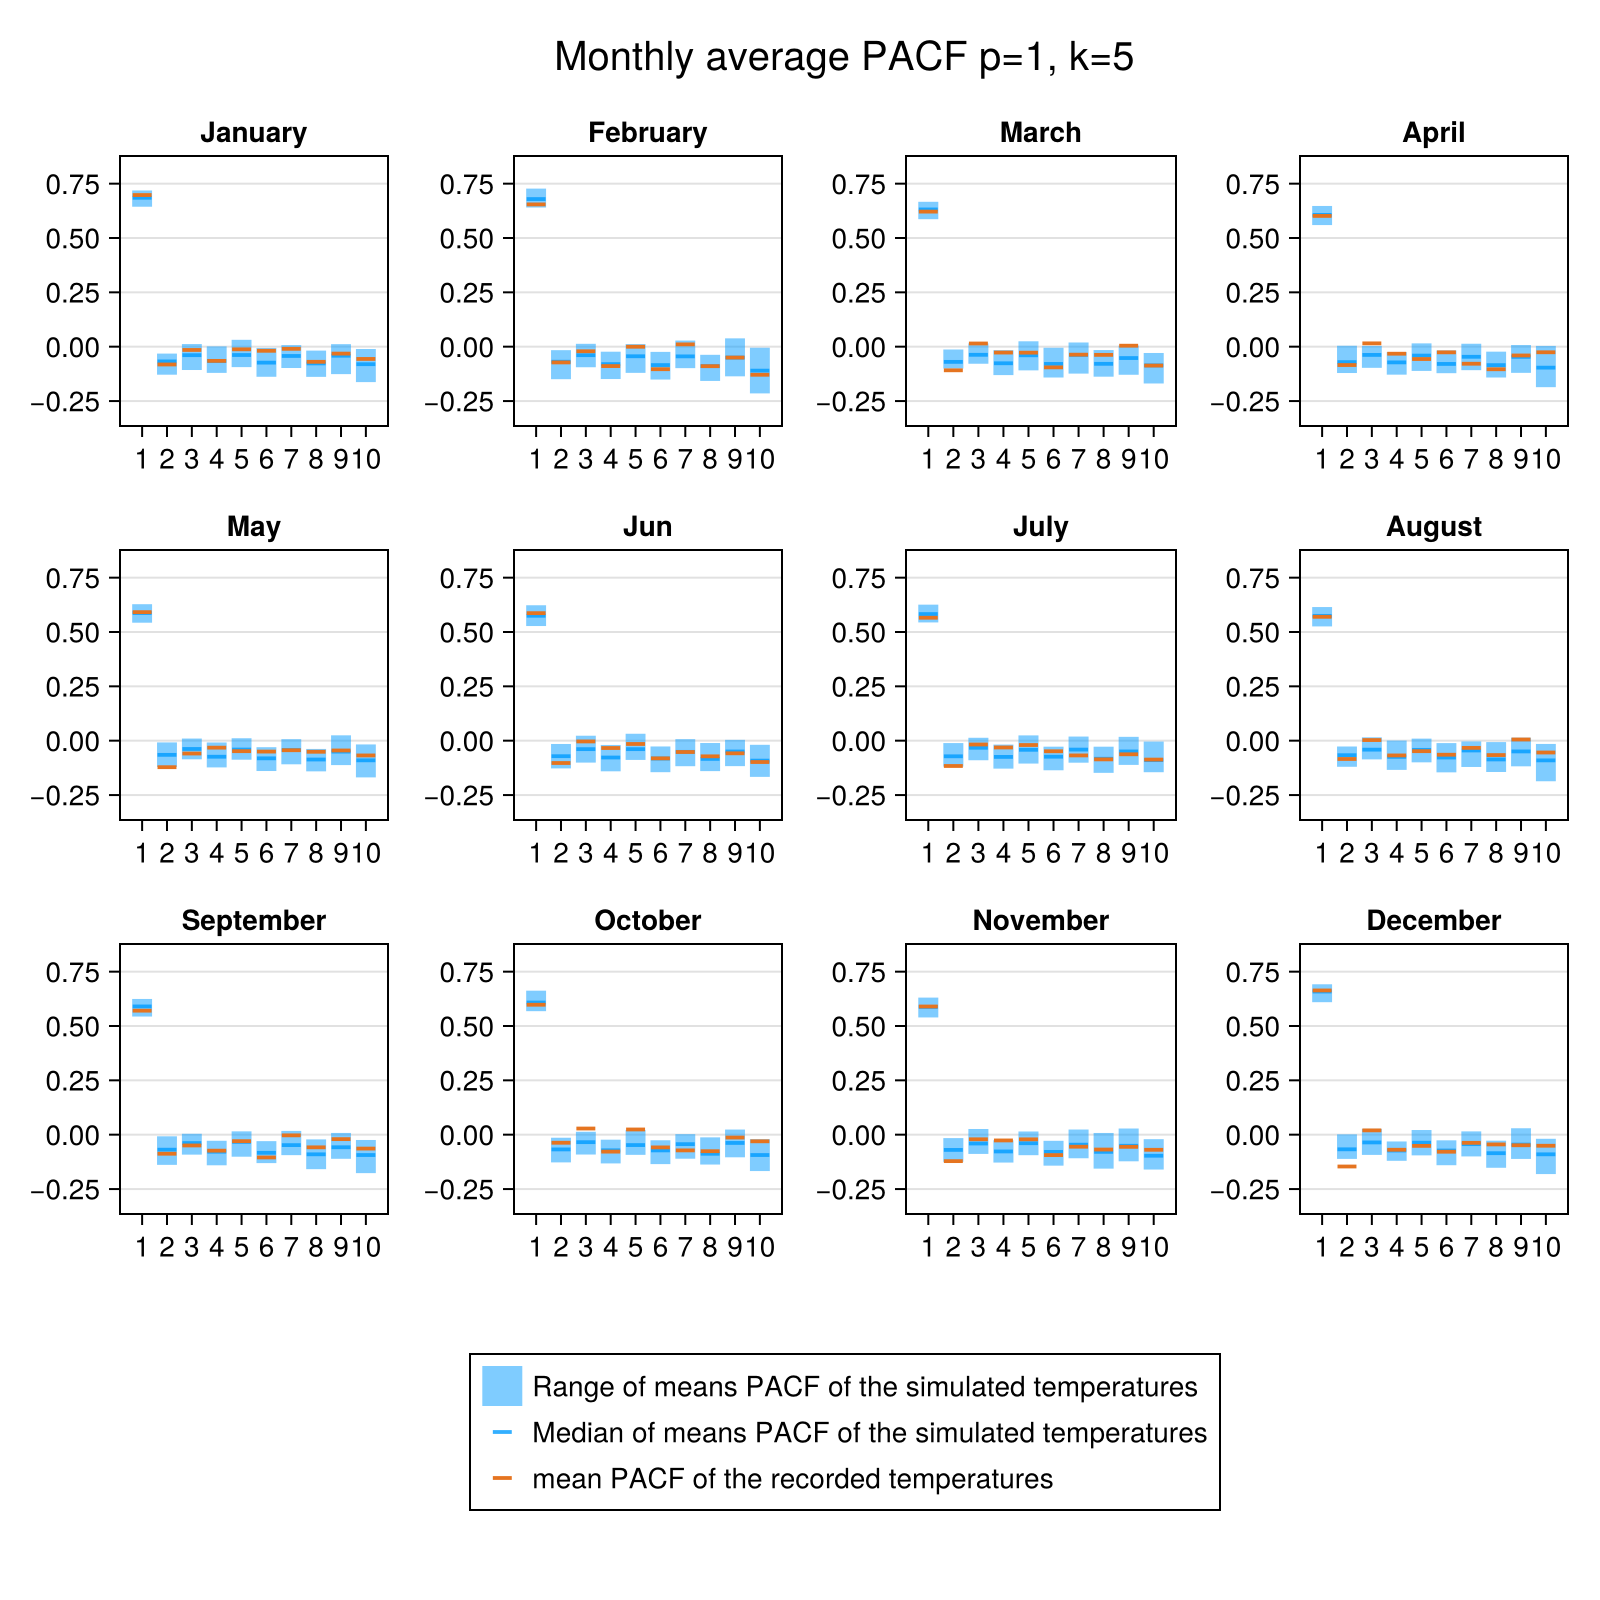

Additive periodicity order : 5
Multiplicative periodicity order : 5


In [6]:
fig_tuple = Sample_diagnostic(sample_, Caracteristics_Series, Model, folder=folder, settings=settings)
display.(fig_tuple)
println("Additive periodicity order : $(Model.period_order)")
println("Multiplicative periodicity order : $(Model.σ_period_order)")